# Proyecto - *Data Product Architecture* (Primavera 2021)
## *Chicago Food Inspections*
## Maestría en Ciencia de Datos, ITAM
### M. Sc. Liliana Millán Núñez
### *Checkpoint 1: Starting Point* - *EDA* - *GEDA*
---

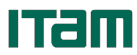

In [1]:
from IPython.display import Image
Image("itam_logo.png")

---

Integrante | Alumno                         | Clave única
---------- | ------------------------------ | -----------
1          | Carlos Román López Sierra      | 197911
2          | José Luis Zárate Cortés        | 183347
3          | Octavio Fuentes Ortiz          | 150792
4          | Patricia Urriza Arellano       | 152026
5          | Uriel Abraham Rangel Díaz      | 193921

Jueves 21 de enero de 2021

---

Trabajaremos con la base de datos de [***Chicago Food Inspections***](https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5).

**Pregunta analítica a contestar con el modelo predictivo**: ¿El establecimiento pasará o no la inspección?

La descripción de las variables es la siguiente:

**Variable**                 | **Tipo de dato**     | **¿Qué contiene?**
-----------------------------| ---------------------| ------------------------------------------------------------------------------------
*Inspection ID*.             | Número.              | *ID* correspondiente a la inspección.
*DBA Name*.                  | Texto.               | _'Doing business as'_ Nombre legal del establecimiento.
*AKA Name*.                  | Texto.               | _'Also known as'_ Nombre público como se conoce al establecimiento.
*Licence*.                   | Número.              | Número único asignado al establecimiento con fines de licenciamiento.
*Facility Type*.             | Texto.               | Cada establecimiento se etiqueta con alguno de los siguientes: *bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school,shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop.*
*Risk*.                      | Texto.               | Cada establecimiento se categoriza de acuerdo al riesgo de afectar la salud pública. 1 el más alto riesgo y 3 el menor. La frecuencia de las inspecciones está ligada a su nivel de riesgo.
*Address, City, State, Zip*. | Texto.               | Dirección completa donde se localizan las instalaciones.
*Inspection Date*.           | *Floating Timestamp*.| Fecha de la inspección.
*Inspection Type*.           | Texto.               | Tipo de inspección, puede ser cualquiera de las siguientes: _canvass_, el tipo de inspección más común realizado con una frecuencia relativa al **riesgo del establecimiento**; _consultation_, es cuando la inspección se realiza por requerimiento del dueño previo a la apertura del establecimiento; _complaint_, se realiza una inspección en respuesta a una queja en contra del establecimiento; _license_, se realiza cuando el establecimiento lo requiere para recibir su lecencia para operar; _suspect food poisoning_, se realiza en respuesta a una o más presonas que presubmiblemente hayan engermado como resultado de haber comiedo en el establecimiento; _task-force inspection_, cuando la inspección se realiza a un bar o taverna.
*Results*.                   | Texto.               | _Pass, pass with conditions, fail, out of business or not located_; '_pass_' implica que no se tienen violaciones críticas o severas (códigos de violación 1-14 y 15-29 respectivamente). '_pass with conditions_', se encontraton violaciones críticas o severas, pero fueron corregidas durante la inspección. '_fail_' implica que se tienen violaciones críticas o severas y que no se corrigieron durante la inspección.
*Violations*.                | Texto.               |  Un establecimiento puede recibir más de una de las 45 distintas violaciones (código de violación 1 al 44 y 70). Pensar en como analizar esta variable.
*Latitude*.                  | Número.              | Latitud del negocio.
*Longitude*.                 | Número.              | Longitud del negocio.
*Location*.                  | *Location*.          | Contiene la coordenada (longitud y latitud) del negocio.

---

#### Conocimiento a priori de la información:
* **_Title:_** *Food Inspections*


* **_Descripción:_**  
  * La información se obtiene de las inspecciones de restaurantes y otros establecimientos de comida en Chicago desde 01/01/2010 hasta la actualidad.
  * Las inspecciones se realizan por personal del ***Chicago Department of Public Health’s Food Protection Program*** siguiendo un procedimiento estandarizado.
  * Se debe precisar que el **01/07/2018 se realizaron modificaciones** a los procedimientos de inspección que afectan a los datos. Estructuralmente el *dataset* no será afectado. No obstante, la columna **_"Violations"_**, si bien aún contiene el número de violación, descripción y comentarios delimitando violaciones independientes con el "*pipe character*", las violaciones actuales se modificaron substancialmente. Debemos ser cuidadosos al analizar los datos en los posibles cambios de tendencia en el largo plazo.
Para consultar las modificaciones: [***Food Inspection Violations Changes***](http://bit.ly/2yWd2JB).
  * En adición, encontramos la modificación a los siguientes términos (**validar en la información**) [_2019 Chicago Food Code Major Changes_](https://www.cityofchicago.org/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html.):
     * _Potentially Hazardous Foods (PHF)" has been changed to “Time/Temperature Control for Safety Foods (TCS Foods)_"
     * "_Critical Violation" has been changed to “Priority (P) Violation_"
     * "_Serious Violation" has been changed to "Priority Foundation (PF)Violation_"
     * "_Minor Violation" has been changed to "Core (C) Violation_"
     * "_Corrected During Inspection (CDI)" has been changed to "Corrected on Site (COS)_"

---
Los paquetes que utilizamos son:
- [***numpy***](https://numpy.org/)
- [***pandas***](https://pandas.pydata.org/)
- [***geopandas***](https://geopandas.org/)
- [***shapely***](https://pypi.org/project/Shapely/)
- [***datetime***](https://docs.python.org/3/library/datetime.html)
- [***csv***](https://docs.python.org/3/library/csv.html)
- [***plotly express***](https://pypi.org/project/plotly-express/)
- [***matplotlib***](https://matplotlib.org/)
- [***seaborn***](https://seaborn.pydata.org/)

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
from shapely import wkt
from datetime import datetime
from datetime import timedelta
import csv
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure

---

Cargamos la base de datos; la llamaremos **df**:

In [3]:
df = pd.read_csv('../DPA/Food_Inspections.csv')

**NOTA**: los datos fueron descargados el 16 de enero.

Ponemos en minúsculas y con guiones bajos los nombres de las columnas de nuestra base de datos:

In [4]:
col_names = df.columns.to_list()
col_name = []
for i in range(len(col_names)):
    col_name.append(col_names[i].replace(" ", "_").lower())
df.columns =col_name

---

### Estructura del *dataframe*

¿Cuántas variables tenemos inicialmente?

In [5]:
len(df.columns)

17

¿Cuántas observaciones tenemos inicialmente?

In [6]:
len(df)

215130

Mostramos los primeros 3 y los últimos 3 datos que tenemos en la base de datos:

In [7]:
df.head(3)

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2472776,HOT DOG STATION,HOT DOG STATION,2153527.0,Restaurant,Risk 1 (High),4742 N KIMBALL AVE,CHICAGO,IL,60625.0,01/15/2021,Canvass Re-Inspection,Pass,56. ADEQUATE VENTILATION & LIGHTING; DESIGNATE...,41.967856,-87.713497,"(-87.7134972229382, 41.96785571643644)"
1,2472716,TIERRA MEXICANA,TIERRA MEXICANA,2483240.0,Restaurant,Risk 1 (High),5423 W BELMONT AVE,CHICAGO,IL,60641.0,01/14/2021,Canvass,Out of Business,NaN,41.938518,-87.762522,"(-87.76252172746399, 41.938517967432716)"
2,2472708,"AQUA FOOD & LIQUOR, INC.","AQUA FOOD & LIQUOR, INC.",2762442.0,Grocery Store,Risk 3 (Low),503 N LaSalle DR,Chicago,IL,60654.0,01/14/2021,License,Pass w/ Conditions,NaN,41.890917,-87.632414,"(-87.63241429043457, 41.890917250209725)"


In [8]:
df.tail(3)

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
215127,164305,PANDA EXPRESS #1422,PANDA EXPRESS #1422,1938611.0,Restaurant,Risk 1 (High),1654 W 119th ST,CHICAGO,IL,60643.0,02/01/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.677617,-87.663113,"(-87.66311314586792, 41.67761705588747)"
215128,158331,DELA LUZ SUPERMERCADO,DELA LUZ SUPERMERCADO,20921.0,Grocery Store,Risk 1 (High),4400 S HONORE ST,CHICAGO,IL,60609.0,02/19/2010,Canvass,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.813911,-87.671327,"(-87.67132698995246, 41.81391135944083)"
215129,67853,METROPOLITAN FAMILY SERVICES MIDWAY CHILDCARE ...,METROPOLITAN FAMILY SERVICES MIDWAY CHILDCARE ...,1443260.0,Daycare Above and Under 2 Years,Risk 1 (High),3215 W 63RD ST,CHICAGO,IL,60629.0,01/12/2010,Canvass,Pass,NaN,41.778853,-87.703781,"(-87.70378111914683, 41.7788532281178)"


¿De qué tipo son nuestras variables iniciales?

In [9]:
df.dtypes

inspection_id        int64
dba_name            object
aka_name            object
license_#          float64
facility_type       object
risk                object
address             object
city                object
state               object
zip                float64
inspection_date     object
inspection_type     object
results             object
violations          object
latitude           float64
longitude          float64
location            object
dtype: object

---

### Valores faltantes

In [10]:
missings_prop = df.apply(lambda x: round(x.isnull().sum()/df.shape[0]*100, 2))
missings_numeric_df = pd.DataFrame({'Proporción de valores faltantes': missings_prop})
missings_numeric_df

,Proporción de valores faltantes
inspection_id,0.00
dba_name,0.00
aka_name,1.16
license_#,0.01
facility_type,2.27
risk,0.03
address,0.00
city,0.07
state,0.02
zip,0.02


- Observamos que en la variable ***violations*** tenemos  casi un 27% de registros faltantes. Esto hace sentido pues es un campo abierto donde se redacta la o las violaciones en las que incurrió el negocio, sin embargo, cuando aparece el campo como vacío, esto podría ser porque el negocio pasó la inspección y por ende no incurrió en violación alguna.

- También observamos que falta el mismo porcentaje tanto en *location*, como en *latitude* y *longitude*. Por lo tanto, consideramos que podremos descartar más adelante la variable *location*, pues contiene información repetida.

---
## EDA

**Funciones auxiliares**: éstas nos ayudarán a realizar el *data profiling*.

In [11]:
def fast_describe(df, vartype='category'):
    """
    Profiling para cualquier tipo de variable 
    
    :df: DataFrame a analizar
    :vartype: Tipo de las variables que se quiere analizar
    """
    
    cat = df.select_dtypes('category')
    obj = df.select_dtypes(np.object)
    num = df.select_dtypes(np.number)
    dt = df.select_dtypes('datetime')
   
    
    if vartype== 'category': 
    # categoricas  / object  
        for i in range(0,len(cat.columns)):
            print("Variable:", cat.columns[i])
            print("Número de registros únicos/categorías:",len(cat.iloc[:,i].unique())) 
            print("Moda: ", cat.iloc[:,i].mode())
            print("Distribución:")
            print(cat.iloc[:,i].value_counts()/ len(cat.iloc[:,i]),"\n")
            
    if vartype== 'numeric':
    # Numericas    
        for i in range(0,len(num.columns)):
            print("Variable:", num.columns[i])
            print(num.iloc[:,i].describe(),)
            print("Número de registros únicos:", len(num.iloc[:,i].unique()))
            
    if vartype== 'object': 
    # object  
        for i in range(0,len(obj.columns)):
            print("Variable:", cat.columns[i])
            print("Número de registros únicos/categorías:",len(obj.iloc[:,i].unique())) 
   
    if vartype== 'datetime':
        for i in range(0,len(dt.columns)):
            print("Variable:", dt.columns[i])
            print("Resumen:",dt.iloc[:,i].describe(datetime_is_numeric=True),"\n")

In [12]:
def fast_describe2(df, vartype='numeric'):
    """
    Profiling para las variables Inspection ID, Licence y Zip.
    
    :df: DataFrame a analizar
    :vartype: Tipo de las variables que se quiere analizar
    """
    
    num = df.select_dtypes(np.number)
    
    if vartype== 'numeric':
    # Numericas    
        for i in range(0,len(num.columns)):
            print("Variable:", num.columns[i])
            print("Número de registros únicos:", len(num.iloc[:,i].unique()))
            print("Porcentaje de valores nulos:", sum(pd.isna(num.iloc[:,i]))/len(num.iloc[:,i]),"\n")

In [13]:
def get_repeated_values(df, col, top):
    top_5 = df.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head(3)
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'

In [14]:
def category_profiling(df, col):
    """
    Profiling for categoric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'mode': df[col].mode().values,
                     'num_categories': df[col].nunique(),
                     'uniques': df[col].nunique(),
                     'missings': df[col].isna().sum(),
                     '(%)_missings': df[col].isna().sum()/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    return profiling

In [15]:
def numeric_profiling(df, col):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique(),
                     'missings': df[col].isna().sum(), 
                     'prop_missings': df[col].isna().sum()/df.shape[0]*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    
    return profiling

In [16]:
def date_profiling(df, col):
    """
    Profiling of fate columns.
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}
    
    profiling.update({'begin':df[col].min(),
                     'end':df[col].max(),
                     'missings': df[col].isna().sum(),
                     'prop_missings': df[col].isna().sum()/df.shape[0]*100,
                     'num_of_obs': df[col].shape[0],
                     'uniques': df[col].nunique()})
    
    return profiling

In [17]:
def text_profiling(df, col):
    """
    Profiling for text columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df_data_violations.max(),
                     'min': df_data_violations.min(),
                     'mean': df_data_violations.mean(),
                     '25%': df_data_violations.quantile(.25),
                     'median': df_data_violations.median(),
                     '75%': df_data_violations.quantile(.75),
                     'missings': df['viol_len2'].value_counts()[0], 
                     'prop_missings': df['viol_len2'].value_counts()[0]/len(df),
                     'language':'English'})
                        
    return profiling

---

### Transformación de variables

- Variables categóricas:

In [18]:
df['dba_name']= df['dba_name'].astype('category')
df['aka_name']= df['aka_name'].astype('category')
df['facility_type']= df['facility_type'].astype('category')
df['risk']= df['risk'].astype('category')
df['address']= df['address'].astype('category')
df['city']= df['city'].astype('category')
df['state']= df['state'].astype('category')
df['inspection_type']= df['inspection_type'].astype('category')
df['results']= df['results'].astype('category')
df['violations']= df['violations'].astype('object')

- Variable de fecha:

In [19]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'], infer_datetime_format=True)

---

## *Data profiling*, antes de transformación de variables y limpieza de los datos

Este primer ejercicio de *data profiling*, nos dará una visión inicial de las variables, sus comportamientos, faltantes y errores.

Una vez identificados éstos, procederemos a la limpieza de datos y transformaciones, para después volver a realizar el ejercicio con sus comentarios correspondientes.

### *Data profiling* variables categóricas

In [20]:
category_variables = df.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(9,
 array(['dba_name', 'aka_name', 'facility_type', 'risk', 'address', 'city',
        'state', 'inspection_type', 'results'], dtype=object))

In [21]:
category_variables = df.select_dtypes(include = 'category').columns.values
category_profiling_output = {elem: category_profiling(df, elem)\
                             for elem in category_variables}

In [22]:
category_profiling_output
df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,dba_name,aka_name,facility_type,risk,address,city,state,inspection_type,results
0,mode,"['SUBWAY'] Categories (28753, object): ['#1 CH...","['SUBWAY'] Categories (27360, object): ['#1 CH...","['Restaurant'] Categories (500, object): ['(co...","['Risk 1 (High)'] Categories (4, object): ['Al...","['11601 W TOUHY AVE '] Categories (18525, obje...","['CHICAGO'] Categories (70, object): ['312CHIC...","['IL'] Categories (4, object): ['IL', 'IN', 'N...","['Canvass'] Categories (110, object): ['1315 l...","['Pass'] Categories (7, object): ['Business No..."
1,num_categories,28753,27360,500,4,18525,70,4,110,7
2,uniques,28753,27360,500,4,18525,70,4,110,7
3,missings,0,2487,4892,69,0,158,50,1,0
4,(%)_missings,0,1.15605,2.27397,0.0320736,0,0.073444,0.0232418,0.000464835,0
5,top1_repeated,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,Canvass,Pass
6,top2_repeated,DUNKIN DONUTS,DUNKIN DONUTS,Grocery Store,Risk 2 (Medium),5700 S CICERO AVE,Chicago,WI,License,Fail
7,top3_repeated,MCDONALD'S,7-ELEVEN,School,Risk 3 (Low),500 W MADISON ST,chicago,NY,Canvass Re-Inspection,Pass w/ Conditions


In [23]:
fast_describe(df, "category")

Variable: dba_name
Número de registros únicos/categorías: 28753
Moda:  0    SUBWAY
Name: dba_name, dtype: category
Categories (28753, object): ['#1 CHINA EXPRESS, LTD.', '#1 CHOP SUEY', '#1 CHOP SUEY RESTAURANT', '#1 CHOP SUEY RESTAURANT, INC', ..., 'subway restaurant 1', 'tien giang restaurant', 'unknown', 'vitino pizzeria']
Distribución:
SUBWAY                    0.013517
DUNKIN DONUTS             0.007335
MCDONALD'S                0.002854
7-ELEVEN                  0.002180
MCDONALDS                 0.001599
                            ...   
MAICHEF CUISINE INC.      0.000005
MAICHEF CUISINE           0.000005
CHATHAM MEAT & GROCERY    0.000005
MAHARAJA BUFFET           0.000005
vitino pizzeria           0.000005
Name: dba_name, Length: 28753, dtype: float64 

Variable: aka_name
Número de registros únicos/categorías: 27361
Moda:  0    SUBWAY
Name: aka_name, dtype: category
Categories (27360, object): ['#1 CHINA EXPRESS , LTD', '#1 CHOP SUEY', '#1 CHOP SUEY RESTAURANT', '#1 DELI', .

***Insights*** para las variables ***categóricas***:

- Tendremos que hacer una limpieza de la base de datos y esto lo observamos de manera muy clara en la variable *city*, pues en la base se encuentra almacenada, de 4 ó más maneras distintas, el nombre de Chicago.

- En la variable *state* observamos que tenemos 4 estados distintos: *WI (Wisconsin), NY (New York), IN (Indiana)* e *IL (Illinois)*, siendo este último casi el 100% de la base de datos. Tendremos que descartar los primeros 3, pues como el nombre de nuestro proyecto lo dice, sólo nos interesa trabajar con las inspecciones de Chicago (ciudad que se encuentra en el estado de *Illinois*). Después de eliminar los registros de los estados distintos a *Illinois*, consideramos ya no necesario tener la columna *state*, pues será un valor repetido y que no aporta al análisis.

- En las variables *dba_name* y *aka_name* observamos que el *top* 5 de negocios inspeccionados son restaurantes de comida rápida (Subway, Dunkin Donuts, 7 Eleven, McDonald's y Burger King). Esto concuerda con lo que observamos en la variable *facility_type*, pues vemos que casi el 67% de las inspecciones son a restaurantes, el 13% a *grocery stores* y el 20% restante se distribuye en negocios con otros giros. Por último, vemos que la limpieza también es necesaria, pues tenemos registros como *MCDONALD'S* y *MCDONALDS*.

- El tipo de riesgo que más se presenta es el 1 (riesgo alto) con el 71.5%, seguido del 2 (riesgo medio) con el 19.5% y el que menos se presenta es el 3 (riesgo bajo), con el 8.5%.

- Con la variable *results*, observamos que debemos crear una columna que contenga la etiqueta 0 cuando la inspección no pasó, la etiqueta 1 cuando la inspección sí pasó y por último, la etiqueta 2 en otro caso. Siguiendo con lo anterior, más del 67% son inspecciones que sí han pasado, 19% son inspecciones que no pasaron y el resto en otro caso.

- El tipo de inspección que más se realiza es el de *canvass* con un 53%.

---

### *Data profiling* variables de fecha

In [24]:
dates_variables = df.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(1, array(['inspection_date'], dtype=object))

In [25]:
date_profiling_output = {elem: date_profiling(df, elem)\
                         for elem in dates_variables}

In [26]:
df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,inspection_date
0,begin,2010-01-04 00:00:00
1,end,2021-01-15 00:00:00
2,missings,0
3,num_of_obs,215130
4,prop_missings,0
5,uniques,2797


In [27]:
fast_describe(df,"datetime")

Variable: inspection_date
Resumen: count                           215130
mean     2015-06-07 22:40:13.521126400
min                2010-01-04 00:00:00
25%                2012-11-20 00:00:00
50%                2015-06-24 00:00:00
75%                2017-11-16 00:00:00
max                2021-01-15 00:00:00
Name: inspection_date, dtype: object 



- Una de las transformaciones que haremos será con la variable *inspection_date*. Crearemos 4 nuevas columnas: una que contenga el año, otra que contenga el mes, otra que contenga el día y otra que contenga el *weekday*. Éstas serán de tipo categóricas y nos servirán tanto para el análisis como para creación de gráficas.

---

### *Data profiling* variables numéricas

Contamos con **5 variables numéricas**: *Inspection ID*, *License #*, *Zip*, *Latitude* y *Longitude*.

De las **primeras 3 variables**, consideramos que lo valioso es conocer el número de registros únicos y el porcentaje de valores nulos. Las últimas dos las trataremos como variables geoespaciales.

In [28]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(5,
 array(['inspection_id', 'license_#', 'zip', 'latitude', 'longitude'],
       dtype=object))

In [29]:
numeric_profiling_output = {elem: numeric_profiling(df, elem)\
                            for elem in number_variables}

In [30]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling[['metric','inspection_id','license_#','zip']]

,metric,inspection_id,license_#,zip
0,max,2.472776e+06,9.999999e+06,60827.000000
1,min,4.424700e+04,0.000000e+00,10014.000000
2,mean,1.528870e+06,1.630342e+06,60628.759227
3,stdv,6.614742e+05,9.027653e+05,116.778081
4,25%,1.188711e+06,1.247748e+06,60614.000000
5,median,1.528174e+06,1.992224e+06,60625.000000
6,75%,2.104620e+06,2.278360e+06,60643.000000
7,kurtosis,-7.228740e-01,-5.338266e-01,165217.314759
8,skewness,-5.389695e-01,-8.821248e-01,-388.436249
9,uniques,2.151300e+05,3.911100e+04,112.000000


In [31]:
df_numericas = df[['inspection_id', 'license_#', 'zip']]

In [32]:
fast_describe2(df_numericas,"numeric")

Variable: inspection_id
Número de registros únicos: 215130
Porcentaje de valores nulos: 0.0 

Variable: license_#
Número de registros únicos: 39112
Porcentaje de valores nulos: 7.902198670571282e-05 

Variable: zip
Número de registros únicos: 113
Porcentaje de valores nulos: 0.00024171431227629805 



***Insights*** para las variables ***numéricas***:

- Observando en la variable *inspection_id* que el número de registros únicos es igual al total de renglones de nuestra base de datos, esto nos confirma que este *ID* es único.

- En la variable *zip* observamos que el número de registros únicos es 113, esto nos refleja, que el código postal no es único y que se puede repetir. 

- En la variable *license_#* observamos que el número de registros únicos es 39112. Sabemos que el registro de licencia es único de acuerdo a la información de los metadatos, por lo tanto, el número de repeticiones de licencia, nos puede informar el número de inspecciones que ha recibido el negocio.

De las **últimas 2 variables** (***latitude*** y ***longitude***), consideramos que no tiene sentido realizar *profiling* como si fueran variables numéricas. Nos limitaremos a buscar valores extremos, esto es, puntos que indiquen coordenadas incorrectas.

### *Data profiling* variables geoespaciales

- Aquí trabajamos con las variables **latitude** y **longitude**.


- Lo relevante aquí, consideramos que es obtener la coordenada mínima y la máxima y con esto, verificar que todos los puntos con los que contamos, se encuentran dentro de la ciudad; de lo contrario, conocer cuántos están fuera.

In [33]:
df_numeric_profiling[['metric','latitude','longitude']]

,metric,latitude,longitude
0,max,42.021064,-87.525094
1,min,41.644670,-87.914428
2,mean,41.880910,-87.676426
3,stdv,0.081026,0.058527
4,25%,41.832580,-87.707338
5,median,41.891893,-87.666420
6,75%,41.939792,-87.634955
7,kurtosis,-0.350778,2.425704
8,skewness,-0.589562,-1.046365
9,uniques,17248.000000,17248.000000


***Insights*** para las variables ***geoespaciales***:

- Observamos que la **latitud mínima** es **41.644670132198044** y la **máxima** es **42.02106424782547**. Por otro lado, observamos que la **longitud mínima** es **-87.91442843927048** y la **máxima** es **-87.5250941359867**.


- Dado que las coordenadas de Illinois están alrededor de la longitud -87 y de la latitud 41, parece que las coordenadas que proporciona la base de datos están bien almacenadas.


- En caso de requerir las coordenadas faltantes, buscaremos una propuesta adecuada para hacerlo.

---

### *Data profiling* variables de texto 

**Nota**: Creamos las columnas *viol_len1* y *viol_len2*, esto para rellenar valores faltantes y para poder ver el largo de los caracteres, respectivamente. Más adelante quitaremos la columna de *viol_len1*.

In [34]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(2, array(['violations', 'location'], dtype=object))

In [35]:
df['viol_len1'] = df['violations']
df['viol_len1'].fillna('n', inplace = True)
df['viol_len1'] = df['viol_len1'].astype("category") 
df['viol_len2'] = df['viol_len1'].apply(lambda x: len(x))
df['viol_len2'] = df['viol_len2'].apply(lambda x: 0 if x == 1 else x)

In [36]:
df_data_violations = df['viol_len2'].apply(lambda x: np.nan if x == 0 else x)
df_data_violations.dropna(inplace = True)

In [37]:
text_profiling_output = {elem: text_profiling(df, elem)\
                            for elem in string_variables}

In [38]:
df_text_profiling = pd.DataFrame(text_profiling_output).reset_index()
df_text_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_text_profiling[['metric','violations']]

,metric,violations
0,max,11620
1,min,30
2,mean,1235.42
3,25%,547
4,median,977
5,75%,1649
6,missings,57447
7,prop_missings,0.267034
8,language,English


In [39]:
num_viol = df["violations"].str.split("|", expand = True)
num_viol.shape

(215130, 34)

In [40]:
# Valores Faltantes en la variable "Violations" y su relación con la variable "Results" pasó la prueba.
stp1 = pd.DataFrame(df, columns = ['violations', 'results'])
stp2 = stp1[stp1['results'].str.contains('Pass')]
print("Conteo de valores nulos en violations:\n", stp1.count()['results'] - stp1.count()['violations'])

Conteo de valores nulos en violations:
 57447


In [41]:
# Conteo de valores nulos en la variable "Results"
dist = stp2[stp2['violations'].isna()].groupby(['results']).agg(count=('results','count'))
dist

,count
results,
Business Not Located,0
Fail,0
No Entry,0
Not Ready,0
Out of Business,0
Pass,25925
Pass w/ Conditions,568


***Insights*** para la variable de texto:

- A partir de los metadatos sabemos que una inspección puede tener más de una violación (código y descripción). Con el *data profiling* observamos  que se tiene un máximo de 34 violaciones cometidas por establecimiento en una sola inspección.

- Observamos que nuestra hipótesis acerca de que los valores faltantes en la variable '_Violations_' no generaliza, pues tan sólo ocurre en 26,493 casos de los 57,447, donde, 25,925 ocurren en *Pass* y 568 ocurren en *Pass w/ Conditions*.

## Transformación de variables y limpieza de los datos

- Lo primero que hacemos es dejar de considerar la variable *location*, pues repite información que ya tenemos con *latitude* y *longitude*:

In [42]:
df.drop(['location'], axis = 1, inplace = True)

- Quitamos la columna *viol_len1*:

In [43]:
df.drop(['viol_len1'], axis = 1, inplace = True)

En la variable ***results***, tenemos 7 tipos de resultados distintos:

- *Business Not Located*.
- *No Entry*.
- *Not Ready*.
- *Out of Business*.
- *Fail*.
- *Pass*
- *Pass w/ Conditions*

Crearemos una nueva columna llamada ***label***, donde la etiqueta 0 implica que la inspección no pasó, la etiqueta 1 implica que la inspección sí pasó y por último, la etiqueta 2 en otro caso.

In [44]:
df_np1 = df[df['results'] == 'Business Not Located']
df_np1['label'] = 2

df_np2 = df[df['results'] == 'Fail']
df_np2['label'] = 0

df_np3 = df[df['results'] == 'No Entry']
df_np3['label'] = 2

df_np4 = df[df['results'] == 'Not Ready']
df_np4['label'] = 2

df_np5 = df[df['results'] == 'Out of Business']
df_np5['label'] = 2

df_np6 = df[df['results'] == 'Pass']
df_np6['label'] = 1

df_np7 = df[df['results'] == 'Pass w/ Conditions']
df_np7['label'] = 1

In [45]:
df = df_np1.append(df_np2).append(df_np3).append(df_np4).append(df_np5).append(df_np6).append(df_np7)

Comprobamos que la columna *label* fue creada:

In [46]:
df.head(1)

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,viol_len2,label
1451,2243269,RUSH CHILDREN'S SERVICES,RUSH CHILDREN'S SERVICES,2205277.0,Hospital,Risk 1 (High),1753 W CONGRESS PKWY,CHICAGO,IL,60612.0,2018-12-07,Canvass,Business Not Located,NaN,41.874995,-87.671265,0,2


- Ahora trabajamos con la transformación de '*inspection_date*'. Primero creamos la columna '*inspection_year*' que contiene el año de la inspección:

In [47]:
df['inspection_year']=df['inspection_date'].dt.year

- Ahora creamos la columna '*inspection_month*' que contiene el mes de la inspección:

In [48]:
df['inspection_month']=df['inspection_date'].dt.month

- Ahora creamos la columna '*inspection_day*' que contiene el día de la inspección:

In [49]:
df['inspection_day']=df['inspection_date'].dt.day

- Ahora creamos la columna '*inspection_weekday*' que contiene el día de la semana de la inspección:

In [50]:
df['inspection_weekday']=df['inspection_date'].dt.weekday

- Ahora, limpiaremos la base de datos. Las columnas que son de tipo texto, las pasaremos a minúsculas, pues esto le dará uniformidad a los datos.

In [51]:
df = df.apply(lambda x: x.astype(str).str.lower())

Comprobamos que nuestras columnas ya se encuentran en minúsculas:

In [52]:
df.head(1)

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,...,results,violations,latitude,longitude,viol_len2,label,inspection_year,inspection_month,inspection_day,inspection_weekday
1451,2243269,rush children's services,rush children's services,2205277.0,hospital,risk 1 (high),1753 w congress pkwy,chicago,il,60612.0,...,business not located,nan,41.874994921390616,-87.67126464972608,0,2,2018,12,7,4


- Ahora trabajamos con la variable *city*.

Realizamos un *unique* a la variable, para así poder identificar por un lado cuántas y cuáles ciudades tenemos, pero al mismo tiempo, qué nombres de ciudades tenemos que corregir y agrupar, pues representan la misma ciudad.

In [53]:
cities = df['city'].unique()
cities = pd.DataFrame(cities)
cities.values.tolist()

[['chicago'],
 ['nan'],
 ['alsip'],
 ['cicero'],
 ['schaumburg'],
 ['cchicago'],
 ['griffith'],
 ['chicagochicago'],
 ['rosemont'],
 ['plainfield'],
 ['evanston'],
 ['maywood'],
 ['elk grove village'],
 ['skokie'],
 ['calumet city'],
 ['elmhurst'],
 ['chchicago'],
 ['summit'],
 ['berwyn'],
 ['chicagoi'],
 ['worth'],
 ['east hazel crest'],
 ['evergreen park'],
 ['chcicago'],
 ['highland park'],
 ['bridgeview'],
 ['312chicago'],
 ['wilmette'],
 ['inactive'],
 ['chicagobedford park'],
 ['charles a hayes'],
 ['westmont'],
 ['chicago.'],
 ['bloomingdale'],
 ['justice'],
 ['bolingbrook'],
 ['lake zurich'],
 ['blue island'],
 ['oak park'],
 ['lansing'],
 ['wadsworth'],
 ['palos park'],
 ['chicagohicago'],
 ['niles niles'],
 ['lake bluff'],
 ['schiller park'],
 ['norridge'],
 ['streamwood'],
 ['tinley park'],
 ['oolympia fields'],
 ['lombard'],
 ['country club hills'],
 ['chicago heights'],
 ['burnham'],
 ['des plaines'],
 ['oak lawn'],
 ['glencoe'],
 ['olympia fields'],
 ['frankfort'],
 ['bro

Reemplazamos los nombres incorrectos con los nombres correctos:

In [54]:
df['city'] = df['city'].replace(['chicago','cchicago','chicagochicago',
                                'chchicago','chicagoi', 'chcicago', '312chicago',
                                'chicago.', 'chicagohicago'],'chicago')

In [55]:
df['city'] = df['city'].replace(['chicagobedford park'],'bedford park')

In [56]:
df['city'] = df['city'].replace(['bannockburndeerfield'],'bannockburn deerfield')

In [57]:
df['city'] = df['city'].replace(['oolympia fields'],'olympia fields')

Comprobamos que los cambios en los nombres efectivamente se hicieron:

In [58]:
cities = df['city'].unique()
cities

array(['chicago', 'nan', 'alsip', 'cicero', 'schaumburg', 'griffith',
       'rosemont', 'plainfield', 'evanston', 'maywood',
       'elk grove village', 'skokie', 'calumet city', 'elmhurst',
       'summit', 'berwyn', 'worth', 'east hazel crest', 'evergreen park',
       'highland park', 'bridgeview', 'wilmette', 'inactive',
       'bedford park', 'charles a hayes', 'westmont', 'bloomingdale',
       'justice', 'bolingbrook', 'lake zurich', 'blue island', 'oak park',
       'lansing', 'wadsworth', 'palos park', 'niles niles', 'lake bluff',
       'schiller park', 'norridge', 'streamwood', 'tinley park',
       'olympia fields', 'lombard', 'country club hills',
       'chicago heights', 'burnham', 'des plaines', 'oak lawn', 'glencoe',
       'frankfort', 'broadview', 'naperville', 'new york', 'new holstein',
       'algonquin', 'wheaton', 'bannockburn deerfield'], dtype=object)

- Ahora realizamos una pequeña limpieza en las columnas *dba_name* y *aka_name*:

In [59]:
df['dba_name'] = df['dba_name'].replace(["mcdonald's"],'mcdonalds')

In [60]:
df['dba_name'] = df['dba_name'].replace(["maichef cuisine inc."],'maichef cuisine')

In [61]:
df['dba_name'] = df['dba_name'].replace(["7-eleven"],'7 eleven')

In [62]:
df['dba_name'] = df['dba_name'].replace(["# china express"],'china express')

In [63]:
df['dba_name'] = df['dba_name'].replace(["#1 chop suey", "#1 chop suey restaurant"],
                                        'chop suey')

In [64]:
df['dba_name'] = df['dba_name'].replace(["ricci & company", "ricci & co."],'ricci')

In [65]:
df['aka_name'] = df['aka_name'].replace(["7-eleven"],'7 eleven')

In [66]:
df['aka_name'] = df['aka_name'].replace(["# china express"],'china express')

In [67]:
df['aka_name'] = df['aka_name'].replace(["#1 chop suey", "#1 chop suey restaurant"],
                                        'chop suey')

In [68]:
df['aka_name'] = df['dba_name'].replace(["ricci & company", "ricci & co."],'ricci')

- Nos quedamos sólo con el estado de *Illinois*:

In [69]:
df = df[~df['state'].isin(['wi', 'ny', 'in'])]

Comprobamos que los cambios en los nombres efectivamente se hicieron:

In [70]:
states = df['state'].unique()
states

array(['il', 'nan'], dtype=object)

- Eliminamos la variable *state* pues ya sólo contiene el nombre de *Illinois*:

In [71]:
df.drop(['state'], axis = 1, inplace = True)

---

## *Data profiling*, después de transformación de variables y limpieza de los datos

Realizamos una **segunda iteración** del *data profiling*, esta vez después de haber hecha la respectiva transformación y limpieza de las observaciones. 

In [72]:
df2 = df

In [73]:
df2['dba_name']= df2['dba_name'].astype('category')
df2['aka_name']= df2['aka_name'].astype('category')
df2['facility_type']= df2['facility_type'].astype('category')
df2['risk']= df2['risk'].astype('category')
df2['address']= df2['address'].astype('category')
df2['city']= df2['city'].astype('category')
df2['inspection_type']= df2['inspection_type'].astype('category')
df2['results']= df2['results'].astype('category')
df2['violations']= df2['violations'].astype('object')
df2['inspection_year']= df2['inspection_year'].astype('category')
df2['inspection_month']= df2['inspection_month'].astype('category')
df2['inspection_day']= df2['inspection_day'].astype('category')
df2['inspection_weekday']= df2['inspection_weekday'].astype('category')
df2['label']= df2['label'].astype('category')
df2['license_#']= df2['license_#'].astype('float64')
df2['zip']= df2['zip'].astype('float64')
df2['latitude']= df2['latitude'].astype('float64')
df2['longitude']= df2['longitude'].astype('float64')
df2['inspection_date'] = pd.to_datetime(df2['inspection_date'], infer_datetime_format=True)

### *Data profiling* variables categóricas

In [74]:
category_variables = df2.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(13,
 array(['dba_name', 'aka_name', 'facility_type', 'risk', 'address', 'city',
        'inspection_type', 'results', 'label', 'inspection_year',
        'inspection_month', 'inspection_day', 'inspection_weekday'],
       dtype=object))

In [75]:
category_variables = df2.select_dtypes(include = 'category').columns.values
category_profiling_output = {elem: category_profiling(df2, elem)\
                             for elem in category_variables}

In [76]:
category_profiling_output
df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,dba_name,aka_name,facility_type,risk,address,city,inspection_type,results,label,inspection_year,inspection_month,inspection_day,inspection_weekday
0,mode,"['subway'] Categories (28451, object): ['#1 ch...","['subway'] Categories (28451, object): ['#1 ch...","['restaurant'] Categories (450, object): ['(co...","['risk 1 (high)'] Categories (5, object): ['al...","['11601 w touhy ave '] Categories (18373, obje...","['chicago'] Categories (54, object): ['algonqu...","['canvass'] Categories (99, object): ['1315 li...","['pass'] Categories (7, object): ['business no...","['1'] Categories (3, object): ['0', '1', '2']","['2016'] Categories (12, object): ['2010', '20...","['10'] Categories (12, object): ['1', '10', '1...","['8'] Categories (31, object): ['1', '10', '11...","['1'] Categories (7, object): ['0', '1', '2', ..."
1,num_categories,28451,28451,450,5,18373,54,99,7,3,12,12,31,7
2,uniques,28451,28451,450,5,18373,54,99,7,3,12,12,31,7
3,missings,0,0,0,0,0,0,0,0,0,0,0,0,0
4,(%)_missings,0,0,0,0,0,0,0,0,0,0,0,0,0
5,top1_repeated,subway,subway,restaurant,risk 1 (high),11601 w touhy ave,chicago,canvass,pass,1,2016,10,8,1
6,top2_repeated,dunkin donuts,dunkin donuts,grocery store,risk 2 (medium),5700 s cicero ave,nan,license,fail,0,2017,9,14,3
7,top3_repeated,mcdonalds,mcdonalds,school,risk 3 (low),500 w madison st,schaumburg,canvass re-inspection,pass w/ conditions,2,2014,5,19,4


In [77]:
fast_describe(df2, 'category')

Variable: dba_name
Número de registros únicos/categorías: 28451
Moda:  0    subway
Name: dba_name, dtype: category
Categories (28451, object): ['#1 china express, ltd.', '#1 chop suey restaurant, inc', '#1 deli', '#1 deli, inc', ..., 'zullo's markets, llc', 'zuzu wraps inc', 'zyggyz grill', 'zzs inc.']
Distribución:
subway                                      0.014373
dunkin donuts                               0.007661
mcdonalds                                   0.005625
7 eleven                                    0.002677
chipotle mexican grill                      0.002134
                                              ...   
guernsey bel inc                            0.000005
near south side child development center    0.000005
neal's cuisines                             0.000005
nd food mart                                0.000005
c & k food and liquor                       0.000005
Name: dba_name, Length: 28451, dtype: float64 

Variable: aka_name
Número de registros únicos/categ

***Insights*** para las variables ***categóricas***:

- En las variables *aka_name* y *dba_name* ya podemos apreciar cuál es el verdadero *top* 5, pues *McDonald's* ya no se repite y ahora aparece cuál es el quinto lugar, siendo éste *Chipotle Mexican Grill*.

- En *facility_type* no vemos grandes cambios; después de la limpieza, pasamos de tener 501 registros únicos, a tener 450. Seguimos observando que los restaurantes representan el 66.5%, el 13% a *grocery stores*, el 6% a escuelas y el resto en otro tipo de *facilities*.

- En la variable *city* observamos que la limpieza funcionó. Bajamos el número de registros únicos de 71 a 54. Observamos que 'Chicago' aumentó ligeramente, llegando ya casi a representar el 100% de los registros.

- En la variable *label* observamos que el 67% de los casos sí pasaron la inspección, el 19% de los casos no pasaron la inspección y el 13% restante es el resto de los casos.

- Con *inspection_year* observamos 2016, 2017 y 2014 son los años que más registros de inspección tuvieron. También, que 2020 fue el año con menos registros y hace sentido, pues fue el año de la pandemis por COVID; 2021 no podemos considerarlo como el menos pues apenas vamos en enero.

- Con *inspection_month* observamos que octubre, septiembre y mayo son los 3 meses con más registros de inspección, mientras que diciembre, febrero y julio es cuando menos registros se tienen.

- En *inspection_weekday* observamos que el día que más registros de inspección se tienen es el día, siendo éste martes, mientras que los días que menos registros se tienen es con 5 y 6, esto es, sábado y domingo respectivamente.

---

### *Data profiling* variables de fecha

In [78]:
dates_variables = df2.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(1, array(['inspection_date'], dtype=object))

In [79]:
date_profiling_output = {elem: date_profiling(df2, elem)\
                         for elem in dates_variables}

In [80]:
df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,inspection_date
0,begin,2010-01-04 00:00:00
1,end,2021-01-15 00:00:00
2,missings,0
3,num_of_obs,215127
4,prop_missings,0
5,uniques,2797


In [81]:
fast_describe(df2,"datetime")

Variable: inspection_date
Resumen: count                           215127
mean     2015-06-07 22:10:25.829393408
min                2010-01-04 00:00:00
25%                2012-11-20 00:00:00
50%                2015-06-24 00:00:00
75%                2017-11-16 00:00:00
max                2021-01-15 00:00:00
Name: inspection_date, dtype: object 



---

### *Data profiling* variables numéricas

In [82]:
number_variables = df2.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(4, array(['license_#', 'zip', 'latitude', 'longitude'], dtype=object))

In [83]:
numeric_profiling_output = {elem: numeric_profiling(df2, elem)\
                            for elem in number_variables}

In [84]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling[['metric','license_#','zip']]

,metric,license_#,zip
0,max,9.999999e+06,60827.000000
1,min,0.000000e+00,60007.000000
2,mean,1.630328e+06,60629.096283
3,stdv,9.027634e+05,22.523878
4,25%,1.247748e+06,60614.000000
5,median,1.992224e+06,60625.000000
6,75%,2.278359e+06,60643.000000
7,kurtosis,-5.338511e-01,141.382043
8,skewness,-8.821158e-01,-5.042088
9,uniques,3.910800e+04,109.000000


---
### *Data profiling* variables geoespaciales

In [85]:
df_numeric_profiling[['metric','latitude','longitude']]

,metric,latitude,longitude
0,max,42.021064,-87.525094
1,min,41.644670,-87.914428
2,mean,41.880910,-87.676426
3,stdv,0.081026,0.058527
4,25%,41.832580,-87.707338
5,median,41.891893,-87.666420
6,75%,41.939792,-87.634955
7,kurtosis,-0.350778,2.425704
8,skewness,-0.589562,-1.046365
9,uniques,17248.000000,17248.000000


---
### *Data profiling* variables de texto

**Nota**: aquí las unidades hacen referencia al número de caracteres.

In [86]:
text_profiling_output = {elem: text_profiling(df2, elem)\
                            for elem in string_variables}

In [87]:
df_text_profiling = pd.DataFrame(text_profiling_output).reset_index()
df_text_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_text_profiling[['metric','violations']]

,metric,violations
0,max,11620
1,min,30
2,mean,1235.42
3,25%,547
4,median,977
5,75%,1649
6,missings,57447
7,prop_missings,0.267038
8,language,English


In [88]:
num_viol = df2["violations"].str.split("|", expand = True)
num_viol.shape

(215127, 34)

In [89]:
df2['violations'] = df2['violations'].fillna('x')
df2['n_violations'] = df2['violations'].apply(lambda x: x.count("|") + 1 if x != 'x' else 0)
x = df['n_violations'].value_counts()
x.sort_values()

34        1
33        1
30        2
29        3
28        4
27        6
26       10
25       11
24       19
23       38
22       42
21       67
20      102
19      124
18      215
17      245
16      313
15      513
14      708
13      975
12     1486
11     2143
10     3080
9      4629
8      6744
7      9504
6     13724
5     18568
4     23306
2     25278
3     26601
1     76665
Name: n_violations, dtype: int64

***Insights*** para las variables de ***texto***:

- Debido a que cada violación se encuentra separada por el caractér "|" (*pipe*), realizamos un conteo de estos carácteres para poder conocer el número de violaciones incurridas en cada inspección. Este valor se almacena en una nueva variable con el nombre "*n_violations*". Después de hacer este conteo, los agrupamos por número de violaciones para darnos una idea de cómo se distribuye el número de violaciones que tienen los establecimientos. Observamos que conforme incrementa el número de violaciones, decrece el número de registros, de tal manera que la gran mayoría son establecimientos con 0 violaciones y un sólo restaurante con 34 violaciones (número máximo de violaciones reportado en la base).

---

## GEDA

Función para editar las cantidades en los ejes de las gráficas:

In [90]:
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

---

**Gráfica obligatoria**: Mapa que indica las inspecciones que pasaron y las que no (histórico).

In [91]:
chicago = gpd.read_file("chicomm.shp")

In [92]:
coord = df2.rename(columns = {'latitude': 'x', 'longitude': 'y'}, inplace=False)

In [93]:
points= gdf(coord, geometry=gpd.points_from_xy(coord.y, coord.x))

In [94]:
chicago['coords'] = chicago['geometry'].apply(lambda x: x.representative_point().coords[:])
chicago['coords'] = [coords[0] for coords in chicago['coords']]

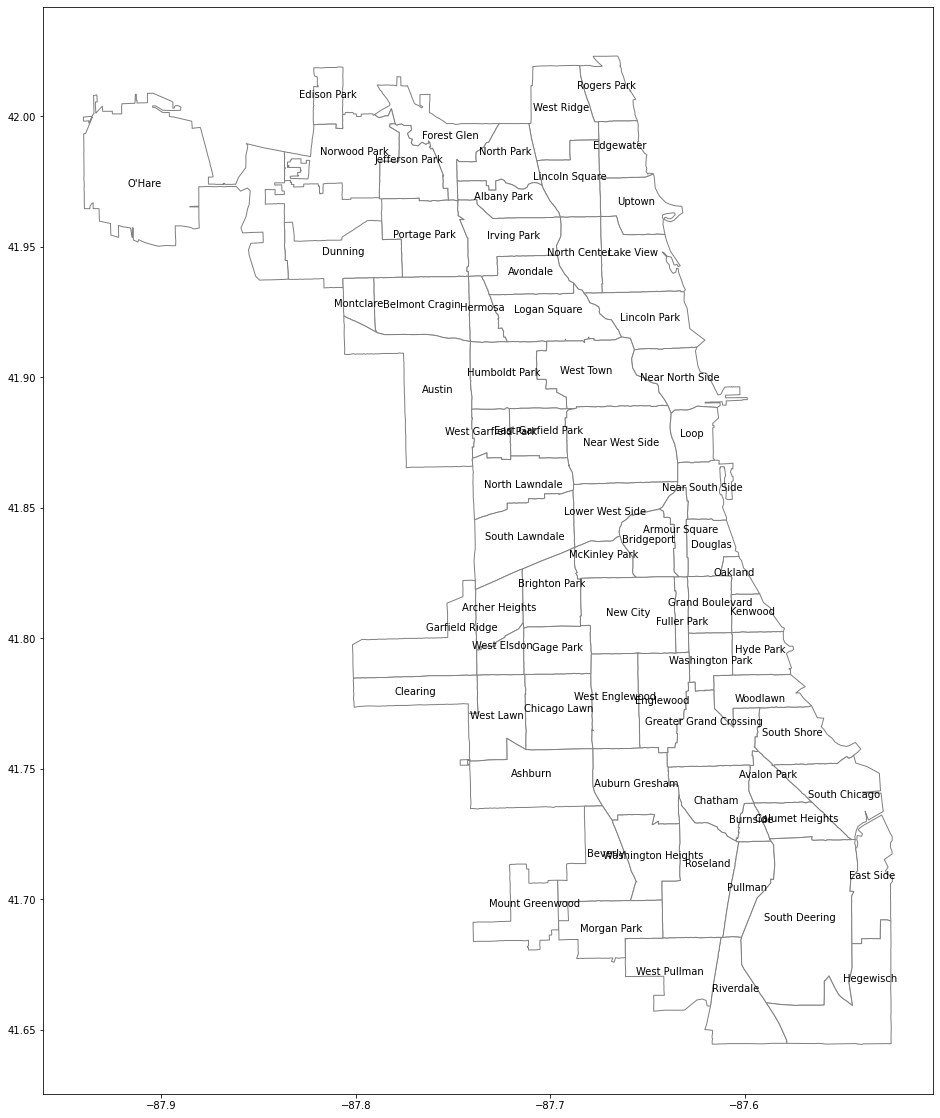

In [95]:
fig, ax = plt.subplots(figsize = (18,20))
chicago.plot(ax=ax,color='white', edgecolor='gray')
for idx, row in chicago.iterrows():
    plt.annotate(s=row['DISTITLE'], xy=row['coords'],
                 horizontalalignment='center')

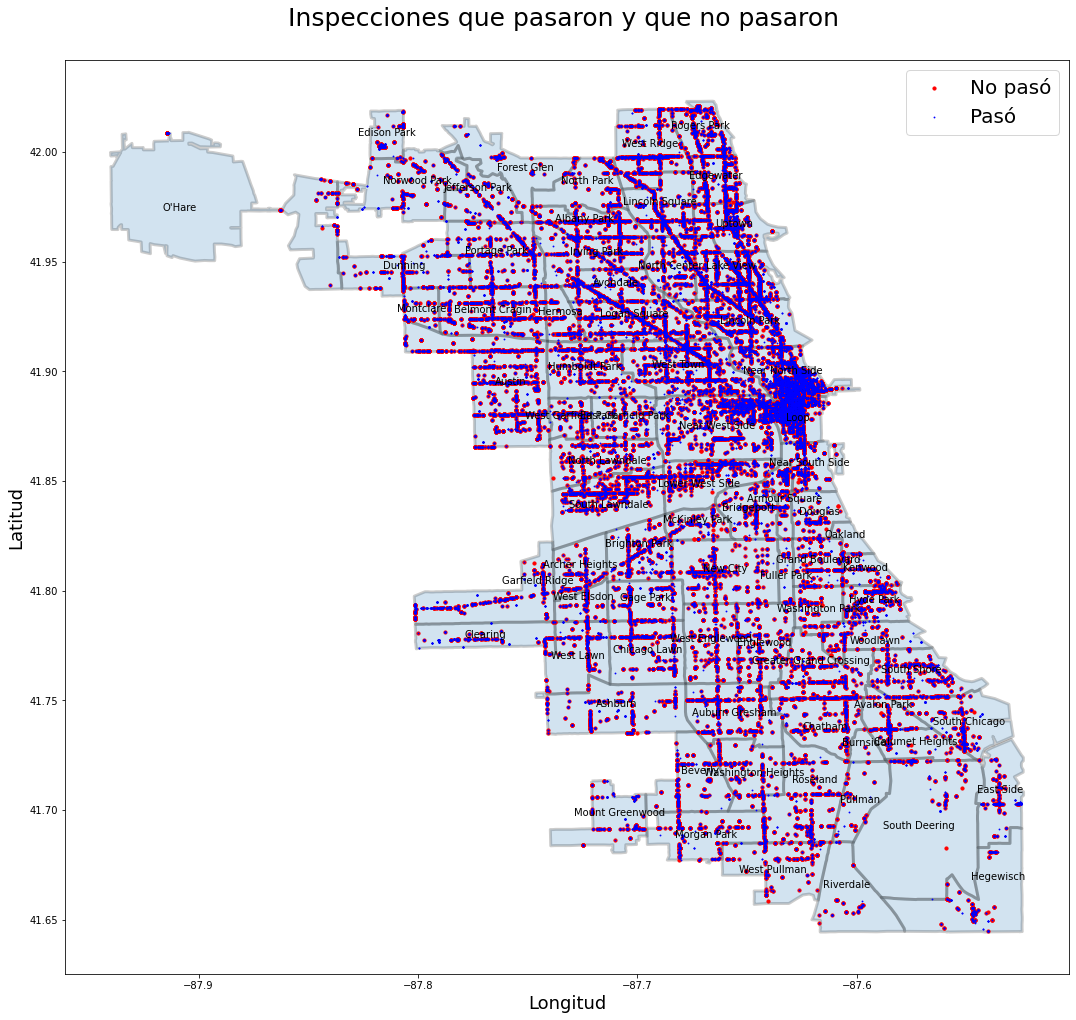

In [96]:
fig, ax = plt.subplots(figsize = (18,22))
chicago.plot(ax=ax, edgecolor='black',linewidth=3,alpha=0.20)
points[points["label"]=="0"].plot(ax=ax, markersize=10, color="red", marker="o", label="No pasó")
points[points["label"]=="1"].plot(ax=ax, markersize=.7, color="blue", marker="o", label="Pasó")
plt.legend(loc="upper right", prop={'size': 20})
for idx, row in chicago.iterrows():
    plt.annotate(s=row['DISTITLE'], xy=row['coords'],
                 horizontalalignment='center'), plt.title("Inspecciones que pasaron y que no pasaron \n", size = 25),
    plt.xlabel('Longitud', fontsize=18), plt.ylabel('Latitud', fontsize=18)

***Insights***:
 
- Observamos una gran concentración en el centro noreste de Chicago; esto corresponde a los distritos de *Near North Side, Loop* y *Near South Side*, pues corresponden a una zona de negocios y comercios que se llama *Central Chicago*.

- En la esquina superior izquierda, parece que sólo hay dos puntos (uno encima del otro), pero esto se debe a que es el aeropuerto de la ciudad. Esto nos indica que probablemente no haya muchos restaurantes adentro del aeropuerto.

- Vemos que en la esquina inferior derecha, en el distrito de *South Deering* casi no hay puntos, pues éste es una zona industrial.

- En el resto de la ciudad, parece que las inspecciones se realizaron de manera uniforme.

---

**Gráficas no obligatorias**:

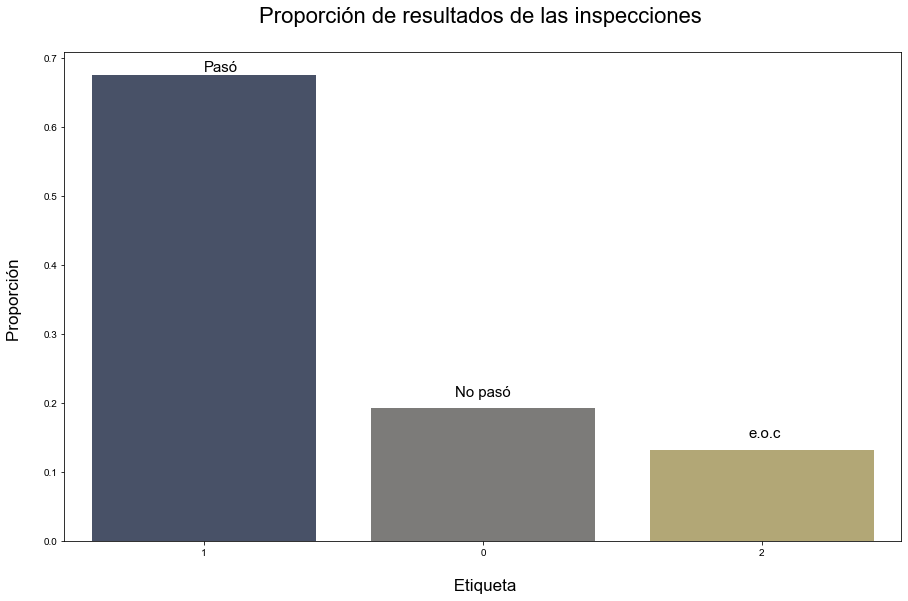

In [97]:
fig = plt.figure(figsize=(15,9))
b = sns.barplot(x=df2.label.value_counts().index, 
                    y=df2.label.value_counts()/len(df2), 
                    data=df2,           
                    palette='cividis',
               order = ["1", "0", "2"])
plt.title("Proporción de resultados de las inspecciones \n", size= 22)
plt.xlabel("\n Etiqueta", size = 17)
plt.text(0.000001000,0.68,'Pasó', size = 15)
plt.text(0.9,0.21,'No pasó', size = 15)
plt.text(1.95,0.15,'e.o.c', size = 15)
plt.ylabel("Proporción \n", size = 17)
sns.set_style("whitegrid")
b.yaxis.set_major_formatter(plt.FuncFormatter(number_formatter))

plt.show()

***Insights***:
 
La gráfica nos ayuda a observar que: 
- Casi un 70% de los resultados de las inspecciones corresponden a la etiqueta 1, es decir, fueron *Pass* o *Pass w/ Conditions*.
- Casi un 20% de los resultados de las inspecciones corresponden a la etiqueta 0, es decir, fueron *Fail*.
- El resto de los resultados corresponden a *Business Not Located, No Entry, Not Ready* y *Out of Business*.

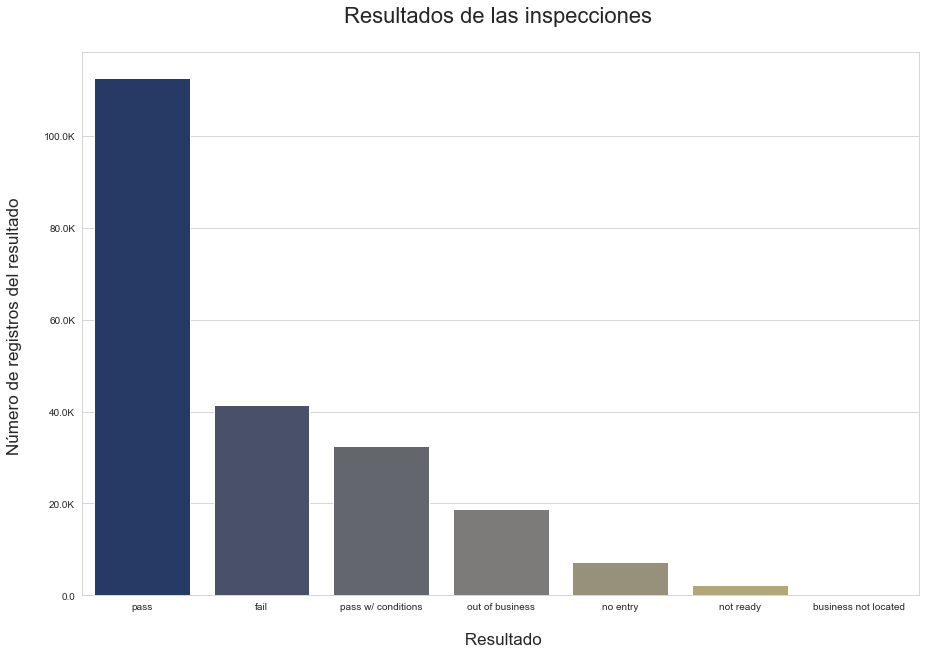

In [98]:
fig = plt.figure(figsize=(15,10))
b = sns.barplot(x=df2.results.value_counts().index, 
                    y=df2.results.value_counts(), 
                    data=df2,           
                    palette='cividis',
               order = ["pass", "fail", "pass w/ conditions", "out of business",
                       "no entry", "not ready", "business not located"])
plt.title("Resultados de las inspecciones \n", size= 22)
plt.xlabel("\n Resultado", size = 17)
plt.ylabel("Número de registros del resultado \n", size = 17)
sns.set_style("whitegrid")
b.yaxis.set_major_formatter(plt.FuncFormatter(number_formatter))

plt.show()

***Insights***:

El resultado de las inspecciones es la variable más relevante de nuestra base de datos ya que contiene la respuesta al problema que queremos resolver. Saber si el establecimiento pasará o no una inspección. De la gráfica podemos resaltar lo siguiente:

- En el periodo evaluado (2010 a 2020) la gran mayoría de inspecciones resultaron favorables; es decir, pasaron la inspección.
- Si consideramos que el resultado "pass w/conditions" también es un resultado favorable, obtenemos una mayor proporción de establecimientos que cumplen y han cumplido con las inspecciones realizadas en los últimos 10 años.
- La proporción de establecimientos que fallaron la inspección es de aproximadamente una tercera parte de los que sí la pasaron y si se considera los que pasaron con condiciones, la proporción de resultados fallidos se hace aún menor.
- Los registros catalogados como 'out of bussines', 'no entry' y 'not ready', aunque tienen un valor de número de registros considerables, pero no informan de la resultado de la evaluación, porque no se pudo realizar por alguna razón propia del negocio (está fuera de operación, no se encontró, no estaba listo o no hubo inspección).
- La categoría 'business not located', prácticamente no tiene representación en la base de datos.


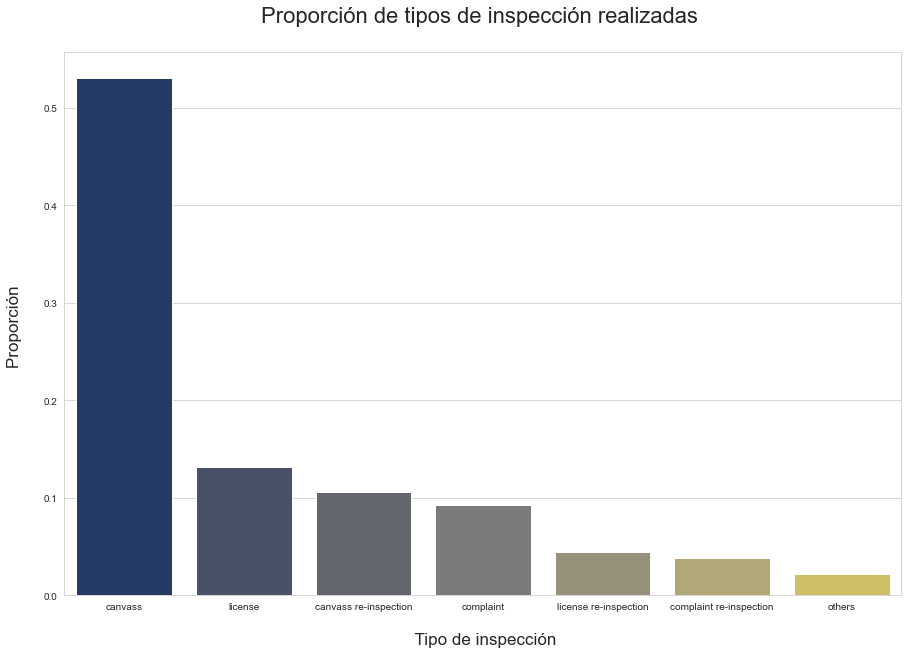

In [99]:
# NOTA: Creamos la columna 'inspection' para poder graficar.

df2['inspection'] = df2['inspection_type'].apply(lambda x: 'canvass' if x == 'canvass'
                                                                   else ('license' if x == 'license'
                                                                   else ('complaint' if x == 'complaint'
                                                                   else ('license re-inspection' if x == 'license re-inspection'
                                                                   else ('canvass re-inspection' if x == 'canvass re-inspection'
                                                                   else ('complaint re-inspection' if x == 'complaint re-inspection'
                                                                   else ('short form complaint' if x == 'short form complaint'
                                                                   else 'others')))))))
fig = plt.figure(figsize=(15,10))
b = sns.barplot(x=df2.inspection.value_counts().index,
                    y=df2.inspection.value_counts()/len(df2),
                    data=df2,
                    palette='cividis',
               order = ["canvass", "license", "canvass re-inspection", "complaint",
                       "license re-inspection", "complaint re-inspection", "others"])
plt.title("Proporción de tipos de inspección realizadas \n", size= 22)
plt.xlabel("\n Tipo de inspección", size = 17)
plt.ylabel("Proporción \n", size = 17)
sns.set_style("whitegrid")
b.yaxis.set_major_formatter(plt.FuncFormatter(number_formatter))
plt.show()

***Insights***:

Se tienen 98 tipos de inspecciones en total. En la gráfica enseñamos los 7 tipos más relevantes y el resto lo agrupamos en l categoría *others*. A partir de esto, observamos:

- El 53% de las inspecciones realizadas son de tipo *canvass*, esto es, inspecciones realizadas con cierta periodicidad de acuerdo con el riesgo que se cataloga a cada establecimiento.

- Del 47% restante, sólo *licence* y *canvass re-inspection* apenas alcanzan a rebasar el 10%.

- Si bien *others* agrupa 91 tipos de inspección, vemos que apenas representa un pequeño porcentaje del total de inspecciones; ni siquiera el 5%. Esto nos pone a pensar que a lo mejor son inspecciones especializadas o a lo mejor son inspecciones que no son tan necesarias para el tipo de negocio que se tienen en la ciudad de Chicago.

- Lo que observamos en la gráfica es congruente con la información que se menciona en los metadatos, donde se indica que *canvass* es el tipo más común de inspección que se ejecuta, con base en el tipo de riesgo que está relacionado con el establecimiento.

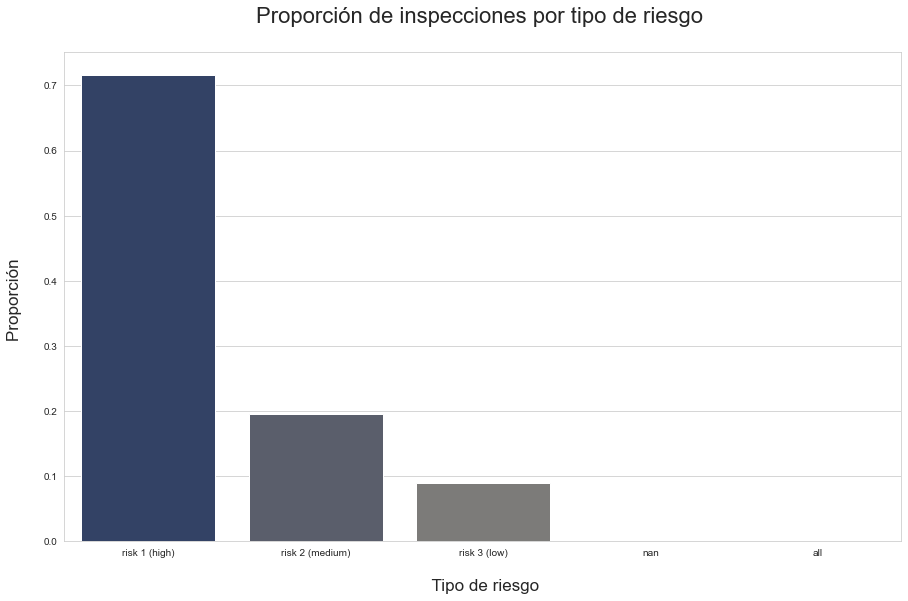

In [100]:
fig = plt.figure(figsize=(15,9))
b = sns.barplot(x=df2.risk.value_counts().index, 
                    y=df2.risk.value_counts()/len(df2), 
                    data=df2,           
                    palette='cividis',
               order = ["risk 1 (high)", "risk 2 (medium)", "risk 3 (low)", "nan", "all"])
plt.title("Proporción de inspecciones por tipo de riesgo \n", size= 22)
plt.xlabel("\n Tipo de riesgo", size = 17)
plt.ylabel("Proporción \n", size = 17)
sns.set_style("whitegrid")
b.yaxis.set_major_formatter(plt.FuncFormatter(number_formatter))

plt.show()

***Insights***:
 
- Con la gráfica podemos observar que más del 70% de los riesgos encontrados en las inspecciones corresponden al tipo de riesgo 1, casi el 20% corresponde al riesgo tipo 2 y menos del 10% corresponde al tipo de riesgo 3.

- Siguiendo con lo anterior, si el tipo de riesgo 1 es el más alto, es porque la mayoría de las inspecciones se realizan en restaurantes. Esto lo vimos en nuestro *data profiling* con la variable *facility_type*.

- Observamos también que tenemos una categoría que se llama *all* que considera los tres tipos de riesgos y también registros que están vacíos. Éstos son prácticamente nulos y no afectan el análisis, pues en nuestro *data profiling* observamos que son tan sólo 29 y 69 registros respectivamente.